In [ ]:
%matplotlib inline


.. currentmodule:: dgl

DGL Basics
==========

**Author**: `Minjie Wang <https://jermainewang.github.io/>`_, Quan Gan, Yu Gai,
Zheng Zhang

In this tutorial, you learn how to create a graph and how to read and write node and edge representations.


Creating a graph
----------------
The design of :class:`DGLGraph` was influenced by other graph libraries. You 
can create a graph from networkx and convert it into a :class:`DGLGraph` and 
vice versa.



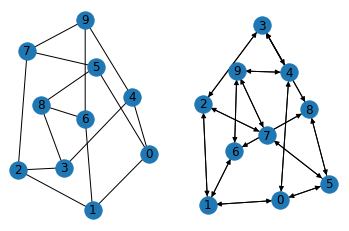

In [2]:
import networkx as nx
import dgl

g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)

plt.show()

The examples here show the same graph, except that :class:`DGLGraph` is always directional.

You can also create a graph by calling the DGL interface.

In the next example, you build a star graph. :class:`DGLGraph` nodes are a consecutive range of
integers between 0 and :func:`number_of_nodes() <DGLGraph.number_of_nodes>`
and can grow by calling :func:`add_nodes <DGLGraph.add_nodes>`.
:class:`DGLGraph` edges are in order of their additions. Note that
edges are accessed in much the same way as nodes, with one extra feature: *edge broadcasting*.



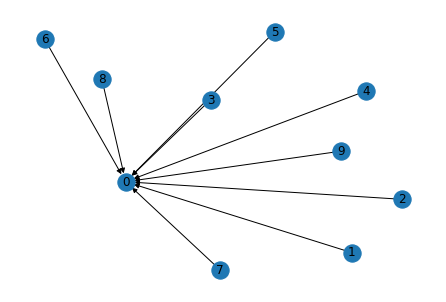

In [3]:
import dgl
import torch as th

g = dgl.DGLGraph()
g.add_nodes(10)
# A couple edges one-by-one
for i in range(1, 4):
    g.add_edge(i, 0)
# A few more with a paired list
src = list(range(5, 8)); dst = [0]*3
g.add_edges(src, dst)
# finish with a pair of tensors
src = th.tensor([8, 9]); dst = th.tensor([0, 0])
g.add_edges(src, dst)

# Edge broadcasting will do star graph in one go!
g.clear(); g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
g.add_edges(src, 0)

import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

Assigning a feature
-------------------
You can also assign features to nodes and edges of a :class:`DGLGraph`.  The
features are represented as dictionary of names (strings) and tensors,
called **fields**.

The following code snippet assigns each node a vector (len=3).

<div class="alert alert-info"><h4>Note</h4><p>DGL aims to be framework-agnostic, and currently it supports PyTorch and
   MXNet tensors. The following examples use PyTorch only.</p></div>



In [4]:
import dgl
import torch as th

x = th.randn(10, 3)
g.ndata['x'] = x

:func:`ndata <DGLGraph.ndata>` is a syntax sugar to access the state of all nodes. 
States are stored
in a container ``data`` that hosts a user-defined dictionary.



In [ ]:
print(g.ndata['x'] == g.nodes[:].data['x'])

# Access node set with integer, list, or integer tensor
g.nodes[0].data['x'] = th.zeros(1, 3)
g.nodes[[0, 1, 2]].data['x'] = th.zeros(3, 3)
g.nodes[th.tensor([0, 1, 2])].data['x'] = th.zeros(3, 3)

Assigning edge features is similar to that of node features,
except that you can also do it by specifying endpoints of the edges.



In [ ]:
g.edata['w'] = th.randn(9, 2)

# Access edge set with IDs in integer, list, or integer tensor
g.edges[1].data['w'] = th.randn(1, 2)
g.edges[[0, 1, 2]].data['w'] = th.zeros(3, 2)
g.edges[th.tensor([0, 1, 2])].data['w'] = th.zeros(3, 2)

# You can also access the edges by giving endpoints
g.edges[1, 0].data['w'] = th.ones(1, 2)                 # edge 1 -> 0
g.edges[[1, 2, 3], [0, 0, 0]].data['w'] = th.ones(3, 2) # edges [1, 2, 3] -> 0

After assignments, each node or edge field will be associated with a scheme
containing the shape and data type (dtype) of its field value.



In [ ]:
print(g.node_attr_schemes())
g.ndata['x'] = th.zeros((10, 4))
print(g.node_attr_schemes())

You can also remove node or edge states from the graph. This is particularly
useful to save memory during inference.



In [ ]:
g.ndata.pop('x')
g.edata.pop('w')

Working with multigraphs
~~~~~~~~~~~~~~~~~~~~~~~~
Many graph applications need parallel edges. To enable this, construct :class:`DGLGraph`
with ``multigraph=True``.



In [ ]:
g_multi = dgl.DGLGraph(multigraph=True)
g_multi.add_nodes(10)
g_multi.ndata['x'] = th.randn(10, 2)

g_multi.add_edges(list(range(1, 10)), 0)
g_multi.add_edge(1, 0) # two edges on 1->0

g_multi.edata['w'] = th.randn(10, 2)
g_multi.edges[1].data['w'] = th.zeros(1, 2)
print(g_multi.edges())

An edge in multigraph cannot be uniquely identified by using its incident nodes
$u$ and $v$; query their edge IDs use ``edge_id`` interface.



In [ ]:
eid_10 = g_multi.edge_id(1, 0)
g_multi.edges[eid_10].data['w'] = th.ones(len(eid_10), 2)
print(g_multi.edata['w'])

<div class="alert alert-info"><h4>Note</h4><p>* Nodes and edges can be added but not removed.
   * Updating a feature of different schemes raises the risk of error on individual nodes (or
     node subset).</p></div>



Next steps
----------
In the :doc:`next tutorial <3_pagerank>` you learn the
DGL message passing interface by implementing PageRank.

